In [17]:
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold
from numpy.linalg import matrix_power
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import linalg
import networkx as nx
import pandas as pd
import numpy as np
import random
import math
import sys, os
sys.path.append("..")
from llr import LLR 


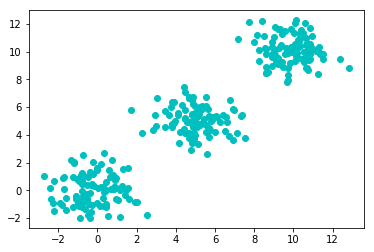

In [18]:


"""
noise = 0.1*np.random.normal(0,1,100)
X = np.ndarray(shape=(n_samples,2), dtype=float, order='F')
y = np.ndarray(shape=(n_samples), dtype=float, order='F')

x = np.arange(0,1,1/n_samples)
for t, i in zip(x, range(0,n_samples)):
    y[i] = math.sin(4*math.pi*t) + noise[i]
    X[i] = [math.cos(2*math.pi*t), math.sin(2*math.pi*t)]
"""

# Generate data of 100 samples from 3 Gaussians centered at (0, 0), (5, 5) and (10, 10)

n_samples = 100

# beta [0 1]
x_1, y = make_blobs(n_samples=n_samples, n_features=2, centers = [[0., 0.]], cluster_std=1.0)

# beta [1 0]
x_2, y = make_blobs(n_samples=n_samples, n_features=2, centers=[[5., 5.]], cluster_std=1.0)

# beta [1 1]
x_3, y = make_blobs(n_samples=n_samples, n_features=2, centers=[[10., 10.]], cluster_std=1.0)

# Merge the blobs into one data set 
X = np.block([[x_1], [x_2], [x_3]])
X_data = np.array(X)

y_1 = np.zeros(n_samples)
y_2 = np.zeros(n_samples)
y_3 = np.zeros(n_samples)


# Assign unique beta values to each blob
for i in range(0,n_samples): 
    y_1[i] = 1 + 0 * x_1[i,0] + x_1[i,1]
    y_2[i] = 1 + 1 * x_2[i,0] + 0*x_2[i,1]
    y_3[i] = 1 + x_3[i,0] + x_3[i,1]

# Merge the reponses into a signle array
y_data= np.concatenate((y_1, y_2, y_3))

# Plot the data set 
fig = plt.figure()
plt.plot(X_data[:, 0], X_data[:, 1], 'co')
plt.show()



In [19]:
# Constants 
p = len(X[0,:])
n = len(X[:,0])
var = 0.5;
mu = 1
v = 1

MSE fit= 7.417600866977531e-15
MSE predict=  7.077024301773808e-19


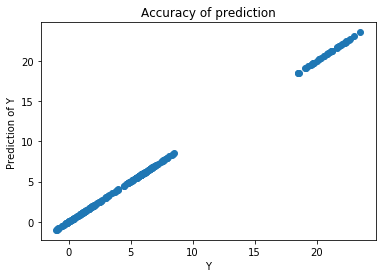

In [28]:
# Fitting the model and predicting response of new data points 
x = np.arange(0,240,1)
#Theta = np.zeros(3*n)

llr = LLR()
regression = llr.fit(X_data[1:240], y_data[1:240], mu, v, perm_size=50, var=var)
#Theta = regression.Theta
Y = regression.Y
Y_test = regression.predict(X[240:300])

"""
Theta_real = np.zeros(3*n)
for i in range(0, n):
    Theta_real[i] = 1
    
for i in range(n, int(n/3)):
    Theta_real[i] = 0
for i in range(int(n+n/3), int(2*n)):
    Theta_real[i] = 1

for i in range(2*n, int(2*n+n/3)):
    Theta_real[i] = 1
for i in range(int(2*n+n/3), int(2*n+2*n/3)):
    Theta_real[i] = 0
for i in range(int(2*n+2*n/3), 3*n):
    Theta_real[i] = 1

"""

MSE = mean_squared_error(y_data[1:240], Y);
MSE_test = mean_squared_error(y_data[240:300], Y_test);

print("MSE fit=", MSE)
print("MSE predict= ", MSE_test)

plt.figure()
plt.xlabel('Y')
plt.ylabel('Prediction of Y ')
plt.title('Accuracy of prediction')
plt.scatter(y_data[1:240], Y)
plt.show() 



In [29]:
x = np.arange(0, 240, 1)
#Theta = np.zeros(3*n)
W = np.zeros((239, 239))

for i in range(0, 239):
    for j in range(0, 239):
        if i != j:
            W[i,j] = math.exp((-1)*np.linalg.norm(X_data[i]-X_data[j])**2/var**2);

llr = LLR()
regression = llr.fit(X_data[1:240], y_data[1:240], mu, v, perm_size=50, var = None, Graph=W)
#Theta = regression.Theta
Y = regression.Y
Y_test = regression.predict(X[240:300])

"""
Theta_real = np.zeros(3*n)
for i in range(0, n):
    Theta_real[i] = 1
    
for i in range(n, int(n/3)):
    Theta_real[i] = 0
for i in range(int(n+n/3), int(2*n)):
    Theta_real[i] = 1

for i in range(2*n, int(2*n+n/3)):
    Theta_real[i] = 1
for i in range(int(2*n+n/3), int(2*n+2*n/3)):
    Theta_real[i] = 0
for i in range(int(2*n+2*n/3), 3*n):
    Theta_real[i] = 1
"""

MSE = mean_squared_error(y_data[1:240], Y);
MSE_test = mean_squared_error(y_data[240:300], Y_test);
print("MSE fit=", MSE)
print("MSE predict= ", MSE_test)

plt.figure()
plt.xlabel('Y')
plt.ylabel('Prediction of Y ')
plt.title('Accuracy of prediction')
plt.scatter(y_data[1:240], Y)
plt.show() 



here again


TypeError: unsupported operand type(s) for ** or pow(): 'NoneType' and 'int'

In [23]:
# Example with higher dimentions 

n_samples = 300
x_6dim, y_6dim = make_blobs(n_samples=n_samples, n_features=6, centers = 3, cluster_std=1.0)

llr = LLR()
regression = llr.fit(x_6dim, y_6dim, mu, v, perm_size=200, var = var)

Y = regression.Y
Y_test = regression.predict(x_6dim)

MSE = mean_squared_error(y_6dim, Y);
MSE_test = mean_squared_error(y_6dim, Y_test);

print("MSE fit=", MSE)
print("MSE predict= ", MSE_test)

MSE fit= 6.966295805686732e-16
MSE predict=  3.2519758870399065e-16
